# K-MEAN CLUSTERING

In [281]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [282]:
df = pd.read_csv('../Datasets/RegData.csv')

In [283]:
df

,StID,SAT,GPA
0,101,1355,3.42
1,102,1391,3.48
2,103,1170,2.91
3,104,1357,3.41
4,105,1326,3.28
...,...,...,...
79,193,1365,3.37
80,195,1479,3.41
81,196,1324,3.40
82,197,1294,3.28


In [284]:
df.shape

(84, 3)

In [285]:
df.dtypes

StID      int64
SAT       int64
GPA     float64
dtype: object

In [286]:
data = df[['SAT', 'GPA']]
data

,SAT,GPA
0,1355,3.42
1,1391,3.48
2,1170,2.91
3,1357,3.41
4,1326,3.28
...,...,...
79,1365,3.37
80,1479,3.41
81,1324,3.40
82,1294,3.28


In [287]:
sil_scores = []
scre = 0; kn = 2; kmx = 9
for k in range(2, kmx):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    labels = kmeans.fit_predict(data)
    sil_score = silhouette_score(data, labels)

    if scre < sil_score:
        scre = sil_score
        kn = k

    sil_scores.append(sil_score)
    print('silhouette Score:', sil_score)

print(kn, ':', scre)

silhouette Score: 0.5788158231251115
silhouette Score: 0.5525252212261366
silhouette Score: 0.4845434069450053
silhouette Score: 0.5471783438976024
silhouette Score: 0.5352833761860257
silhouette Score: 0.5791081886204023
silhouette Score: 0.5516506416491713
7 : 0.5791081886204023


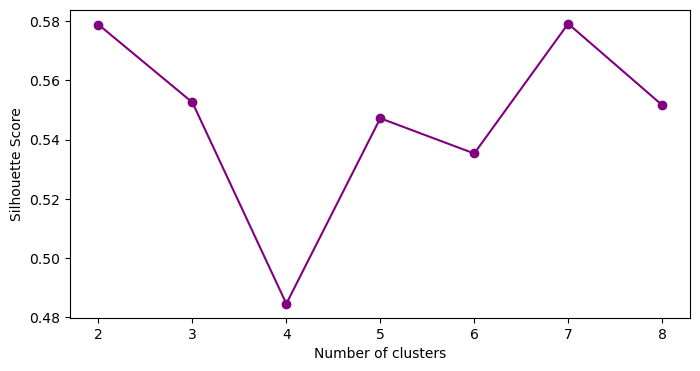

In [288]:
frame = pd.DataFrame({'Cluster': range(2, 9), 'Silhouette Score': sil_scores})
plt.figure(figsize=(8, 4))
plt.plot(frame['Cluster'], frame['Silhouette Score'], marker='o', color='Purple')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

In [289]:
kmns = KMeans(n_clusters=kn, init='k-means++', max_iter = 300, random_state=5)
y_kmeans = kmns.fit_predict(data)
print(y_kmeans)

kmns.cluster_centers_

[4 4 6 4 2 4 3 5 0 3 5 2 2 5 5 3 0 1 0 4 6 4 4 0 4 6 1 3 0 0 0 5 0 2 0 3 1
 5 0 3 4 4 5 3 5 4 3 6 0 1 2 4 2 0 6 5 6 3 1 6 5 4 5 0 4 0 5 0 2 2 4 5 5 5
 0 6 1 4 1 4 0 2 5 4]


array([[1448.05882353,    3.48294118],
       [1221.42857143,    3.09      ],
       [1318.        ,    3.42      ],
       [1515.66666667,    3.58222222],
       [1365.11111111,    3.39055556],
       [1274.4375    ,    3.178125  ],
       [1171.25      ,    3.        ]])

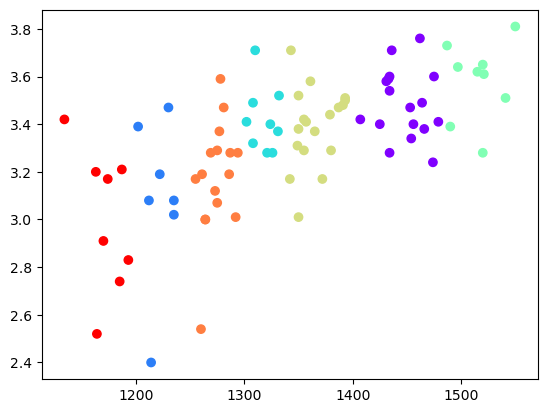

In [290]:
plt.scatter(df['SAT'], df['GPA'], c=y_kmeans, cmap='rainbow')